In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import random
import scipy as sp

#### Synchronization indicators

$\sigma^2 = \frac{1}{N} \left \langle \sum_i (x_i - \langle x\rangle_s)^2 \right \rangle_t $

$\sigma '^2 = \frac{1}{N} \left \langle \sum_i (x_i - x_0)^2 \right \rangle_t $

The first one tends to zero when the network synchronizes isochronously $(x_i(t) = x_j(t)
∀i, j)$, while the second one tends to zero only when the network synchronizes in the steady state ($x_i(t) = x_0 ∀i$, with $x_0 = f(x_0)$ being the fixed point of the uncoupled maps).

In [2]:
class Logistic:
    def __init__(self, epsilon = 0.5, t_0 = int(0), T = int(100), a = 2.5,
                     x0 = 1.3, tau_zero = int(1), n_nodes = None, graph = None):
        '''
        PARAMETERS:
        epsilon: float
        t_0: float
        T:float
           Total time of simulated activity
        n_nodes: int
            Number of logistic maps
        x0: float
            Initial state of the logistic map
        tau_zero: int
            Delay parameter
        graph: networkx graph
        '''
        if n_nodes is None:
            raise ValueError("n_nodes must be specified")
        else:
            self.n_nodes = n_nodes
        self.epsilon = epsilon
        self.t_0 = t_0
        self.T = T
        self.x0 = [x0]
        self.tau_zero = tau_zero
        self.a = a
        if graph is None:
            raise ValueError("graph must be specified")
        else:
            self.G = graph
        
    def logistic(self, x):
        return x*self.a*(1-x)
    
    def adjacency_matrix(self):
        self.M = nx.to_numpy_array(self.G)
        return self.M
    
    def calculate_b(self,index):
        return np.sum(self.M[index])
    
    def Tau_matrix(self):
        self.tau_matrix = []
        c = 2
        for i in range(0,self.n_nodes):
            tau = []
            for j in range(0,self.n_nodes):
                tau.append(int(self.tau_zero + c*np.random.uniform(0,1)))
            self.tau_matrix.append(tau)
        return self.tau_matrix
    
    def interation(self):
        self.M = self.adjacency_matrix()
        self.tau_matrix = self.Tau_matrix()
        self.mapas = {}
        tau_max = max(max(self.tau_matrix))
        for i in range(0,self.n_nodes):
            self.mapas[i] = [(np.random.uniform(0,1))] #Definindo os valores iniciais dos mapas    
        for t in range(1,self.T): #Percorre nos intervalos de tempo
            if t>=tau_max:
                for i in range(0,self.n_nodes): #Percorre em todos os nós
                    x_T = (1-self.epsilon)*self.logistic(self.mapas[i][t-1])
                    soma = []
                    for j in range(0,self.n_nodes): #Calcula o somatorio pra cada um dos nós
                        tau = self.tau_matrix[i][j]
                        soma.append((self.epsilon/self.calculate_b(i))*self.M[i][j]*
                                    self.logistic(self.mapas[j][t-tau])) 
                    x_T = x_T + np.sum(soma)
                    self.mapas[i].append(x_T)
                    
            else: 
                for i in range(0,self.n_nodes): #Percorre em todos os nós
                    x_T = self.logistic(self.mapas[i][t-1])
                    soma = []
                    for j in range(0,self.n_nodes): #Calcula o somatorio pra cada um dos nós
                        tau = self.tau_matrix[i][j]
                        soma.append(0) 
                    x_T = x_T + np.sum(soma)
                    self.mapas[i].append(x_T)
        
        return self.mapas
        
    def run(self):
        return self.interation()
    
    def Sigma(self):
        space_mean = []
        for i in range(self.n_nodes): #Calculando a media espacial 
            space_mean.append(self.mapas[i][self.T-1])
        space_mean = np.mean(space_mean)
        sigma = []
        for i in range(n_nodes): #Somatorio 
            k = (self.mapas[i][self.T-1]-space_mean)**2
            sigma.append(k)
        sigma = sum(sigma)
        return (1/self.n_nodes)*(sigma/self.T) #Retorna a média temporal do somatorio divido por n_nodes
    
    def Sigma_line(self):
        sigma_line = []
        for i in range(n_nodes):
            k = (self.mapas[i][self.T-1]- self.mapas[i][0])**2
            sigma_line.append(k)
        sigma_line = sum(sigma_line)
        return (1/self.n_nodes)*(sigma_line/self.T)
    
    
    def TESTE_cu(self):
        av = []
        for i in range(0,self.n_nodes):
            av.append(np.mean(self.mapas[i]))
        cu = []
        for j in range(0,self.n_nodes):
            cuzin = []
            for i in range(0,self.T):
                cuzin.append((self.mapas[j][i]-av[j])**2)
            cu.append(np.mean(cuzin))
        tes = []
        for i in range(0,len(cu)):
            tes.append(cu[i]/n_nodes)
        return sum(tes)

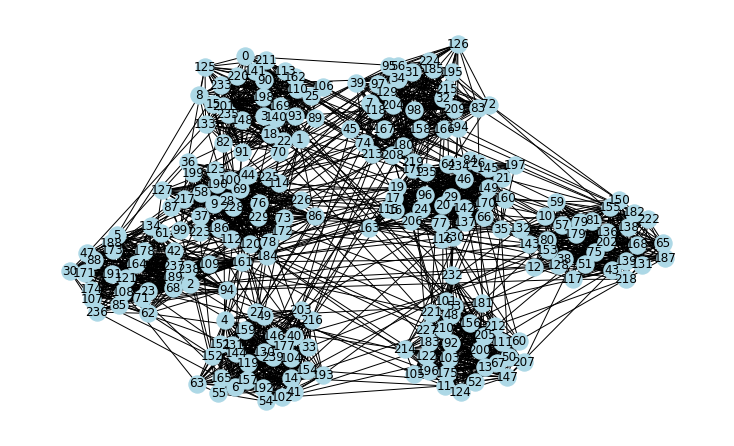

In [210]:
N = 240
tau1 = 3
tau2 = 1.5
mu = 0.04
k = 20
minc = 30
maxc = 30
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)
G.remove_edges_from(nx.selfloop_edges(G))
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show()

In [30]:
# N = 7500  #Number of nodes in the created graph.
# gam = 3  #Power law exponent for the degree distribution of the created graph
# bet = 2 #Power law exponent for the community size distribution in the created graph
# mu = 0.3 #Fraction of inter-community edges incident to each node
# G = nx.LFR_benchmark_graph(N, tau1=gam, tau2=bet, mu=mu, average_degree=5,max_degree=80,
#                      min_community=5,max_community=180)

In [241]:
T = 25
n_nodes = N
log = Logistic(epsilon = 0.01, T = T, a = 4, n_nodes = n_nodes, tau_zero = 5, graph = G)

In [242]:
mapas = log.run()
sigmas = log.Sigma()
sigmas

0.004482392297966728

### Olhar amanha

In [282]:
matrix_sigmas = []
matrix_sigmas_line = []
matrix_cu = []
for i in range(0,100):
    N = 240
    tau1 = 3
    tau2 = 1.5
    mu = 0.01*i
    k = 20
    minc = 30
    maxc = 30
    list_sigmas = []
    list_sigmas_line = []
    list_cu = []
    for j in range(0,100):
        T = 15
        G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                            max_degree = k, min_community=minc, max_community = maxc, seed = 10)
        G.remove_edges_from(nx.selfloop_edges(G))
        n_nodes = N
        log = Logistic(epsilon = 0.01*j, T = T, a = 4, n_nodes = n_nodes,
                       tau_zero = 5, graph = G)
        mapas = log.run()
        list_sigmas.append(log.Sigma())
        list_sigmas_line.append(log.Sigma_line())
        list_cu.append(log.TESTE_cu())
    matrix_sigmas.append(list_sigmas)
    matrix_sigmas_line.append(list_sigmas_line)
    matrix_cu.append(list_cu)

In [276]:
len(matrix_cu[0])

100

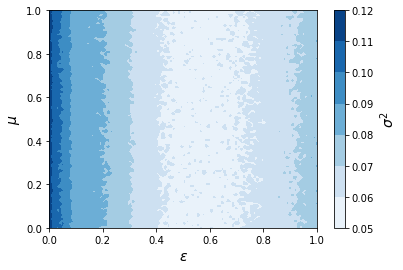

In [283]:
epsilon_values = np.linspace(0,1,100)
mu_values = np.linspace(0,1,100)
CS = plt.contourf(epsilon_values,mu_values,matrix_cu, cmap = "Blues") #O eixo y ta trocado, é pra ser de 20 ate 2 
                                                                           #e nao de 2 ate 20.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel(r"$\sigma^2$", fontsize = 14)
plt.xlabel(r"$\varepsilon$", fontsize = 14)
plt.ylabel(r'$\mu$', fontsize = 14)
# plt.savefig('sigma_communities_TerceiroTeste_blues.png', dpi = 150, bbox_inches = 'tight')
plt.show()

### TALVEZ ESSE SEJA O JEITO CERTO DE CALCULAR O $\sigma^2$

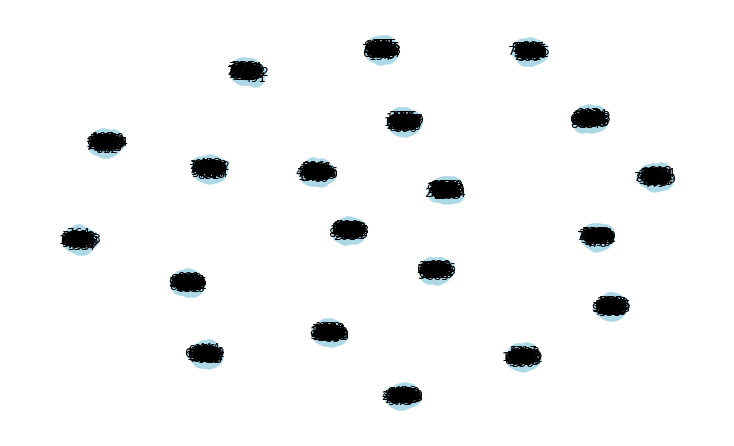

In [367]:
N = 1000  #Number of nodes in the created graph.
gam = 3  #Power law exponent for the degree distribution of the created graph
bet = 2 #Power law exponent for the community size distribution in the created graph
mu = 0.01 #Fraction of inter-community edges incident to each node
# print(mus[i])
G = nx.LFR_benchmark_graph(N, tau1=gam, tau2=bet, mu=mu, average_degree=15,max_degree=30,
                               min_community=50,max_community=50)
G.remove_edges_from(nx.selfloop_edges(G))
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show()

In [362]:
T = 10
n_nodes = N
log = Logistic(epsilon = 0.1, T = T, a = 4, n_nodes = n_nodes, tau_zero = 5, graph = G)

In [363]:
mapas = log.run()

In [364]:
av = []
for i in range(0,n_nodes):
    av.append(np.mean(mapas[i]))
cu = []
for j in range(0,n_nodes):
    cuzin = []
    for i in range(0,T):
        cuzin.append((mapas[j][i]-av[j])**2)
    cu.append(np.mean(cuzin))
tes = []
for i in range(0,len(cu)):
    tes.append(cu[i]/n_nodes)
sum(tes)

0.09196218846233406

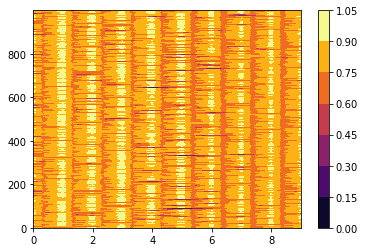

In [365]:
individuais = []
numeros=[]
for j in range(len(mapas)):
    individuais.append(mapas[j])
    numeros.append(j)
#plotar os estados finais
# plt.plot(finais)
CS = plt.contourf(individuais,vmin=0, vmax=1, cmap = "inferno")
cbar = plt.colorbar(CS)

### Segundo Teste 

In [4]:
matrix_sigmas = []
matrix_sigmas_line = []
matrix_cu = []
for i in range(0,100):
    print("Mu:", 0.01*i)
    N = 1000  #Number of nodes in the created graph.
    gam = 3  #Power law exponent for the degree distribution of the created graph
    bet = 2 #Power law exponent for the community size distribution in the created graph
    mu = 0.01*i #Fraction of inter-community edges incident to each node
    list_sigmas = []
    list_sigmas_line = []
    list_cu = []
    G = nx.LFR_benchmark_graph(N, tau1=gam, tau2=bet, mu=mu, average_degree=15,max_degree=30,
                                   min_community=50,max_community=50)
    G.remove_edges_from(nx.selfloop_edges(G))
    for j in range(0,100):
        T = 10
        n_nodes = N
        log = Logistic(epsilon = 0.01*j, T = T, a = 4, n_nodes = n_nodes,
                       tau_zero = 5, graph = G)
        mapas = log.run()
        list_sigmas.append(log.Sigma())
        list_sigmas_line.append(log.Sigma_line())
        list_cu.append(log.TESTE_cu())
    matrix_sigmas.append(list_sigmas)
    matrix_sigmas_line.append(list_sigmas_line)
    matrix_cu.append(list_cu)

Mu: 0.0
Mu: 0.01
Mu: 0.02
Mu: 0.03
Mu: 0.04
Mu: 0.05
Mu: 0.06
Mu: 0.07
Mu: 0.08
Mu: 0.09
Mu: 0.1
Mu: 0.11
Mu: 0.12
Mu: 0.13
Mu: 0.14
Mu: 0.15
Mu: 0.16
Mu: 0.17
Mu: 0.18
Mu: 0.19
Mu: 0.2
Mu: 0.21
Mu: 0.22
Mu: 0.23
Mu: 0.24
Mu: 0.25
Mu: 0.26
Mu: 0.27
Mu: 0.28
Mu: 0.29
Mu: 0.3
Mu: 0.31
Mu: 0.32
Mu: 0.33
Mu: 0.34
Mu: 0.35000000000000003
Mu: 0.36
Mu: 0.37
Mu: 0.38
Mu: 0.39
Mu: 0.4
Mu: 0.41000000000000003
Mu: 0.42
Mu: 0.43
Mu: 0.44
Mu: 0.45
Mu: 0.46
Mu: 0.47000000000000003
Mu: 0.48
Mu: 0.49
Mu: 0.5
Mu: 0.51
Mu: 0.52
Mu: 0.53
Mu: 0.54
Mu: 0.55
Mu: 0.56
Mu: 0.5700000000000001
Mu: 0.58
Mu: 0.59
Mu: 0.6
Mu: 0.61
Mu: 0.62
Mu: 0.63
Mu: 0.64
Mu: 0.65
Mu: 0.66
Mu: 0.67
Mu: 0.68
Mu: 0.6900000000000001
Mu: 0.7000000000000001
Mu: 0.71
Mu: 0.72
Mu: 0.73
Mu: 0.74
Mu: 0.75
Mu: 0.76
Mu: 0.77
Mu: 0.78
Mu: 0.79
Mu: 0.8
Mu: 0.81
Mu: 0.8200000000000001
Mu: 0.8300000000000001
Mu: 0.84
Mu: 0.85
Mu: 0.86
Mu: 0.87
Mu: 0.88
Mu: 0.89
Mu: 0.9
Mu: 0.91
Mu: 0.92
Mu: 0.93
Mu: 0.9400000000000001
Mu: 0.9500000000000001
Mu

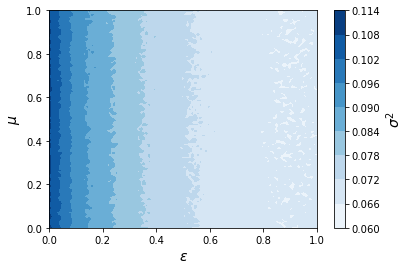

In [11]:
epsilon_values = np.linspace(0,1,100)
mu_values = np.linspace(0,1,100)
CS = plt.contourf(epsilon_values,mu_values,matrix_cu, cmap = "Blues") #O eixo y ta trocado, é pra ser de 20 ate 2 
                                                                           #e nao de 2 ate 20.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel(r"$\sigma^2$", fontsize = 14)
plt.xlabel(r"$\varepsilon$", fontsize = 14)
plt.ylabel(r'$\mu$', fontsize = 14)
plt.savefig('sigma_communities_1000nodes_teste2.png', dpi = 150, bbox_inches = 'tight')
plt.show()

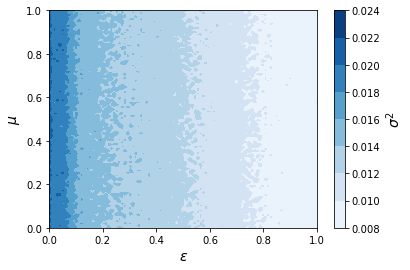

In [8]:
epsilon_values = np.linspace(0,1,100)
mu_values = np.linspace(0,1,100)
CS = plt.contourf(epsilon_values,mu_values,matrix_sigmas_line, cmap = "Blues") #O eixo y ta trocado, é pra ser de 20 ate 2 
                                                                           #e nao de 2 ate 20.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel(r"$\sigma^2$", fontsize = 14)
plt.xlabel(r"$\varepsilon$", fontsize = 14)
plt.ylabel(r'$\mu$', fontsize = 14)
# plt.savefig('sigma_communities_1000nodes_teste2.png', dpi = 150, bbox_inches = 'tight')
plt.show()